# Detecting Neighbours

In [11]:
import os
import pprint
import traci
import numpy as np


## 4x4Grid Intersection

In [12]:
net_file_4x4 = "data/4x4grid_resco_eval/grid4x4.net.xml"
route_file_4x4 = "data/4x4grid_resco_eval/grid4x4_1.rou.xml"
config_file4x4 = "data/4x4grid_resco_eval/grid4x4.sumocfg"

In [13]:
import os
from sumo_rl import parallel_env

env_params = {
    "net_file": net_file_4x4,
    "route_file": route_file_4x4,
}
env = parallel_env(**env_params)

ts_ids_4x4 = list(env.unwrapped.env.ts_ids)

 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 56ms, vehicles TOT 0 ACT 0 BUF 0)                     


/Users/loveen/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pettingzoo/utils/conversions.py:132: UserWarning: The base environment `sumo_rl_v0` does not have a `render_mode` defined.
  warnings.warn(


In [14]:
obs_space = env.observation_spaces

/Users/loveen/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pettingzoo/utils/conversions.py:144: UserWarning: The `observation_spaces` dictionary is deprecated. Use the `observation_space` function instead.
  warnings.warn(


In [15]:
33*16

528

In [16]:
33*3

99

In [17]:
traci.start(["sumo", "-c", config_file4x4])

coords_4x4 = {}
for ts in ts_ids_4x4:
    coords_4x4[ts] = traci.junction.getPosition(ts)

traci.close()

pprint.pprint(coords_4x4)

 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 2ms, vehicles TOT 0 ACT 0 BUF 0)                      
{'A0': (300.0, 300.0),
 'A1': (300.0, 600.0),
 'A2': (300.0, 900.0),
 'A3': (300.0, 1200.0),
 'B0': (600.0, 300.0),
 'B1': (600.0, 600.0),
 'B2': (600.0, 900.0),
 'B3': (600.0, 1200.0),
 'C0': (900.0, 300.0),
 'C1': (900.0, 600.0),
 'C2': (900.0, 900.0),
 'C3': (900.0, 1200.0),
 'D0': (1200.0, 300.0),
 'D1': (1200.0, 600.0),
 'D2': (1200.0, 900.0),
 'D3': (1200.0, 1200.0)}


In [18]:
X = {'A0': (300.0, 300.0),
 'A1': (300.0, 600.0),
 'A2': (300.0, 900.0),
 'A3': (300.0, 1200.0),
 'B0': (600.0, 300.0),
 'B1': (600.0, 600.0),
 'B2': (600.0, 900.0),
 'B3': (600.0, 1200.0),
 'C0': (900.0, 300.0),
 'C1': (900.0, 600.0),
 'C2': (900.0, 900.0),
 'C3': (900.0, 1200.0),
 'D0': (1200.0, 300.0),
 'D1': (1200.0, 600.0),
 'D2': (1200.0, 900.0),
 'D3': (1200.0, 1200.0)}

In [21]:
ts_ids_4x4

['A0',
 'A1',
 'A2',
 'A3',
 'B0',
 'B1',
 'B2',
 'B3',
 'C0',
 'C1',
 'C2',
 'C3',
 'D0',
 'D1',
 'D2',
 'D3']

In [19]:
# X = np.array(list(coords_4x4.values()))

X = np.array(list(X.values()))

from sklearn.neighbors import KDTree

RADIUS = 300

tree = KDTree(X)

map_4x4 = {}
for i, q in enumerate(tree.query_radius(X, r=RADIUS)):
    map_4x4[ts_ids_4x4[i]] = list(ts_ids_4x4[j] \
                                  for j in q if ts_ids_4x4[j] != ts_ids_4x4[i])

pprint.pprint(map_4x4)

{'A0': ['A1', 'B0'],
 'A1': ['A0', 'A2', 'B1'],
 'A2': ['A1', 'A3', 'B2'],
 'A3': ['A2', 'B3'],
 'B0': ['A0', 'B1', 'C0'],
 'B1': ['A1', 'B0', 'B2', 'C1'],
 'B2': ['A2', 'B1', 'B3', 'C2'],
 'B3': ['A3', 'B2', 'C3'],
 'C0': ['B0', 'C1', 'D0'],
 'C1': ['B1', 'C0', 'C2', 'D1'],
 'C2': ['B2', 'C1', 'C3', 'D2'],
 'C3': ['B3', 'C2', 'D3'],
 'D0': ['C0', 'D1'],
 'D1': ['C1', 'D0', 'D2'],
 'D2': ['C2', 'D1', 'D3'],
 'D3': ['C3', 'D2']}


In [20]:
grid4x4_resco_neighbours = {
    'A0': ['B0', 'A1'],
    'A1': ['A0', 'A2', 'B1'],
    'A2': ['A1', 'A3', 'B2'],
    'A3': ['A2', 'B3'],

    'B0': ['A0', 'B1', 'C0'],
    'B1': ['A1', 'B0', 'B2', 'C1'],
    'B2': ['A2', 'B1', 'B3', 'C2'],
    'B3': ['A3', 'B2', 'C3'],

    'C0': ['B0', 'C1', 'D0'],
    'C1': ['B1', 'C0', 'C2', 'D1'],
    'C2': ['B2', 'C1', 'C3', 'D2'],
    'C3': ['B3', 'C2', 'D3'],

    'D0': ['C0', 'D1'],
    'D1': ['C1', 'D0', 'D2'],
    'D2': ['C2', 'D1', 'D3'],
    'D3': ['C3', 'D2']
}

checking to see if the 2 dict match! 

In [49]:
for k, neighbour_list in grid4x4_resco_neighbours.items():
    if k in list(map_4x4.keys()):
        for neighbour in neighbour_list:
            if neighbour not in grid4x4_resco_neighbours[k]:
                print("value: ", neighbour, "not in ", grid4x4_resco_neighbours[k])
    else:
        print("key: ", k, " not in", list(map_4x4.keys()))


## Cologne8

In [4]:
net_file_cologne8 = "data/cologne8_resco_eval/cologne8.net.xml"
route_file_cologne8 = "data/cologne8_resco_eval/cologne8.rou.xml"
config_file_cologne8 = "data/cologne8_resco_eval/cologne8.sumocfg"

In [5]:
import os
from sumo_rl import parallel_env

env_params = {
    "net_file": net_file_cologne8,
    "route_file": route_file_cologne8,
}
env = parallel_env(**env_params)

ts_ids_colonge8 = list(env.unwrapped.env.ts_ids)

 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 12ms, vehicles TOT 0 ACT 0 BUF 0)                     


/Users/loveen/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pettingzoo/utils/conversions.py:132: UserWarning: The base environment `sumo_rl_v0` does not have a `render_mode` defined.
  warnings.warn(


In [6]:
traci.start(["sumo", "-c", config_file_cologne8])

coords = {}
for ts in ts_ids_colonge8:
    coords[ts] = traci.junction.getPosition(ts)

traci.close()

pprint.pprint(coords)

 Retrying in 1 seconds
Step #25200.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 0 ACT 0 BUF 0)                   
{'247379907': (14057.43, 18072.2),
 '252017285': (13791.17, 17242.08),
 '256201389': (14498.06, 17266.64),
 '26110729': (14266.03, 18073.9),
 '280120513': (14184.47, 17335.59),
 '32319828': (13831.28, 16834.98),
 '62426694': (14172.42, 17193.44),
 'cluster_1098574052_1098574061_247379905': (13743.75, 17609.43)}


In [7]:
X = np.array(list(coords.values()))

from sklearn.neighbors import KDTree

RADIUS = 400

tree = KDTree(X)

cologne8_neighbours_old_map = {}
for i, q in enumerate(tree.query_radius(X, r=RADIUS)):
    cologne8_neighbours_old_map[ts_ids_colonge8[i]] = list(ts_ids_colonge8[j] \
                                                           for j in q if ts_ids_colonge8[j] != ts_ids_colonge8[i])

pprint.pprint(cologne8_neighbours_old_map)

{'247379907': ['26110729'],
 '252017285': ['62426694', 'cluster_1098574052_1098574061_247379905'],
 '256201389': ['280120513', '62426694'],
 '26110729': ['247379907'],
 '280120513': ['256201389', '62426694'],
 '32319828': [],
 '62426694': ['252017285', '256201389', '280120513'],
 'cluster_1098574052_1098574061_247379905': ['252017285']}


In [8]:
import sumolib

# Load the SUMO network
net = sumolib.net.readNet(net_file_cologne8)

# Function to get the number of lanes for a specific junction
def get_incoming_lanes_for_junction(junction_id):
    junction = net.getNode(junction_id)
    incoming_edges = junction.getIncoming()

    lanes = set()

    # Count lanes for incoming edges, excluding internal edges
    for edge in incoming_edges:
        for lane in edge.getLanes():
            lanes.add(lane.getID())
                
    return len(lanes)

junction_id_num_lanes = {}

for ts_id in ts_ids_colonge8:
    # Get the number of lanes controlled by the specified junction
    num_lanes = get_incoming_lanes_for_junction(ts_id)

    junction_id_num_lanes[ts_id] = num_lanes

# print(f'The number of lanes controlled by the junction {junction_id} is {num_lanes}')

In [9]:
junction_id_num_lanes

{'247379907': 6,
 '252017285': 4,
 '256201389': 3,
 '26110729': 6,
 '280120513': 4,
 '32319828': 2,
 '62426694': 4,
 'cluster_1098574052_1098574061_247379905': 4}

In [10]:
net = sumolib.net.readNet(net_file_cologne8)

In [11]:
ts_ids_colonge8

['247379907',
 '252017285',
 '256201389',
 '26110729',
 '280120513',
 '32319828',
 '62426694',
 'cluster_1098574052_1098574061_247379905']

In [12]:
junction = net.getNode("cluster_1098574052_1098574061_247379905")
incoming_edges = junction.getIncoming()
incoming_edges

[<edge id="-22959475#4" from="3329935579" to="cluster_1098574052_1098574061_247379905"/>,
 <edge id="-28675510#11" from="294223020" to="cluster_1098574052_1098574061_247379905"/>,
 <edge id="22917421#5" from="247379907" to="cluster_1098574052_1098574061_247379905"/>,
 <edge id="28675510#4" from="258346770" to="cluster_1098574052_1098574061_247379905"/>]

In [13]:
junction.getInternal()

## Ingolstadt

In [15]:
net_file_ingolstadt21 = "data/ingolstadt21/ingolstadt21.net.xml"
route_file_ingolstadt21 = "data/ingolstadt21/ingolstadt21.rou.xml"
config_file_ingolstadt21 = "data/ingolstadt21/ingolstadt21.sumocfg"

In [16]:
import os
from sumo_rl import parallel_env

env_params = {
    "net_file": net_file_ingolstadt21,
    "route_file": route_file_ingolstadt21,
}
env = parallel_env(**env_params)

ts_ids_ingol = list(env.unwrapped.env.ts_ids)

 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 39ms, vehicles TOT 0 ACT 0 BUF 0)                     


/Users/loveen/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pettingzoo/utils/conversions.py:132: UserWarning: The base environment `sumo_rl_v0` does not have a `render_mode` defined.
  warnings.warn(


In [17]:
# hardcoded 
traffic_ids_junction_ids_mapping = {
    'gneJ143': "cluster_1041665625_cluster_1387938793_1387938796_cluster_1757124361_1757124367_32564126",
    'gneJ207': "cluster_274083968_cluster_1200364014_1200364088",
    'gneJ208': "cluster_2302665030_2337351369",
    'gneJ210': "cluster_371462086_469470779_98101387_cluster_371462067_371775459_371775468",
    'gneJ255': "cluster_1833965782_1833965806_371781950_cluster_32564118_371775504",
    'gneJ257': "cluster_1840209209_268417350"
}

In [21]:
import sumolib

# Load the SUMO network
net = sumolib.net.readNet(net_file_ingolstadt21)

# Function to get the number of lanes for a specific junction
def get_incoming_lanes_for_junction(junction_id):
    junction = net.getNode(junction_id)
    incoming_edges = junction.getIncoming()
    # print(junction.getInternal())

    lanes = set()

    # Count lanes for incoming edges, excluding internal edges
    for edge in incoming_edges:
        edge_type = edge.getType()  # Get the type of the edge
        # print(edge_type)
        # print(edge.getID())
        if edge_type != "internal":  # Exclude internal edges based on type
            for lane in edge.getLanes():
                lanes.add(lane.getID())
                
                
    return len(lanes)

junction_id_num_lanes = {}

for ts_id in ts_ids_ingol:
    if ts_id in traffic_ids_junction_ids_mapping.keys():
        # map it to junction id
        junction_id = traffic_ids_junction_ids_mapping[ts_id]
    else:
        junction_id = ts_id 

    # Get the number of lanes controlled by the specified junction
    num_lanes = get_incoming_lanes_for_junction(junction_id)

    junction_id_num_lanes[ts_id] = num_lanes

# print(f'The number of lanes controlled by the junction {junction_id} is {num_lanes}')

In [22]:
junction_id_num_lanes

{'1863241632': 10,
 '2330725114': 8,
 '243351999': 7,
 '243641585': 9,
 '243749571': 12,
 '30503246': 11,
 '30624898': 11,
 '32564122': 10,
 '89127267': 10,
 '89173763': 12,
 '89173808': 10,
 'cluster_1427494838_273472399': 13,
 'cluster_1757124350_1757124352': 9,
 'cluster_1863241547_1863241548_1976170214': 18,
 'cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190': 15,
 'gneJ143': 12,
 'gneJ207': 10,
 'gneJ208': 8,
 'gneJ210': 13,
 'gneJ255': 11,
 'gneJ257': 8}

In [23]:
from copy import deepcopy
ts_ids_original = deepcopy(ts_ids_ingol)

for id, new_id in traffic_ids_junction_ids_mapping.items():
    ts_ids_original.remove(id)
    ts_ids_original.append(new_id)

In [25]:
import traci
traci.start(["sumo", "-c", config_file_ingolstadt21])

ingol_coords = {}
for ts in ts_ids_original:
    ingol_coords[ts] = traci.junction.getPosition(ts)

traci.close()

pprint.pprint(ingol_coords)

 Retrying in 1 seconds
Step #57600.00 (0ms ?*RT. ?UPS, TraCI: 2ms, vehicles TOT 0 ACT 0 BUF 0)                   
{'1863241632': (211854.06, 452380.69),
 '2330725114': (211730.78, 452677.54),
 '243351999': (212743.37, 451715.68),
 '243641585': (212838.9, 452442.96),
 '243749571': (212210.48, 452949.86),
 '30503246': (213383.65, 452432.38),
 '30624898': (213385.29, 452459.55),
 '32564122': (213220.84, 451881.96),
 '89127267': (213240.97, 452982.48),
 '89173763': (211756.54, 451796.68),
 '89173808': (211776.71, 451176.17),
 'cluster_1041665625_cluster_1387938793_1387938796_cluster_1757124361_1757124367_32564126': (213023.53,
                                                                                             451299.65),
 'cluster_1427494838_273472399': (213033.65, 453360.65),
 'cluster_1757124350_1757124352': (213067.1, 451176.18),
 'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504': (213399.24,
                                                                   

In [26]:
X = np.array(list(ingol_coords.values()))

from sklearn.neighbors import KDTree

RADIUS = 400

tree = KDTree(X)

ingol_neighbours_original = {}
for i, q in enumerate(tree.query_radius(X, r=RADIUS)):
    ingol_neighbours_original[ts_ids_ingol[i]] = list(ts_ids_ingol[j] for j in q if ts_ids_ingol[j] != ts_ids_ingol[i])

pprint.pprint(ingol_neighbours_original)

{'1863241632': ['2330725114', 'cluster_1863241547_1863241548_1976170214'],
 '2330725114': ['1863241632', 'gneJ208'],
 '243351999': ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190',
               'gneJ207'],
 '243641585': ['gneJ257'],
 '243749571': ['gneJ208'],
 '30503246': ['30624898', 'gneJ210', 'gneJ255'],
 '30624898': ['30503246', 'gneJ255'],
 '32564122': ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190',
              'gneJ255'],
 '89127267': [],
 '89173763': [],
 '89173808': [],
 'cluster_1427494838_273472399': [],
 'cluster_1757124350_1757124352': ['gneJ143', 'gneJ207'],
 'cluster_1863241547_1863241548_1976170214': ['1863241632'],
 'cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_12003640

In [27]:
neighbours_old_map_restructured = {}

for key, item in ingol_neighbours_original.items():
    neighbours_old_map_restructured[key] = {}
    neighbours_old_map_restructured[key]['neighbours'] = item

for key, item in junction_id_num_lanes.items():
    neighbours_old_map_restructured[key]['num_lanes'] = item

In [28]:
len(neighbours_old_map_restructured)

21

## Cologne8 -> Quick test to check num phases, num_names in net file match observation.py

check no phases in cologne8 

In [41]:
import xml.etree.ElementTree as ET

parsed_cologne8_net = ET.parse(net_file_cologne8)
root = parsed_cologne8_net.getroot()

tllogic_number_phases = {}
for tllogic in root.findall("tlLogic"):
    num_phases = 0
    id = tllogic.get('id')
    
    for phase in tllogic.findall("phase"):
        state = phase.get("state")
        if "y" not in state:
            num_phases += 1
    
    tllogic_number_phases[id] = num_phases

## 

In [42]:
tllogic_number_phases

{'247379907': 4,
 '252017285': 2,
 '256201389': 3,
 '26110729': 4,
 '280120513': 3,
 '32319828': 2,
 '62426694': 3,
 'cluster_1098574052_1098574061_247379905': 4}

In [51]:
import os
import sys 

os.getcwd()

# Path to the directory containing the signal_config.py file
module_path = '/Users/loveen/Desktop/Masters project/RESCO/resco_benchmark/config'
# Add the directory to the Python path
sys.path.append(module_path)

# Now you can import the module
from signal_config import signal_configs

In [57]:
ts_ids_colonge8

['247379907',
 '252017285',
 '256201389',
 '26110729',
 '280120513',
 '32319828',
 '62426694',
 'cluster_1098574052_1098574061_247379905']

In [85]:
cologne8_num_lanes = {}

for id in ts_ids_colonge8:
    unique_lanes = set()
    lane_sets = signal_configs['cologne8'][id]['lane_sets']
    for key, values in lane_sets.items():
        for value in values:
            unique_lanes.add(value)
            
    cologne8_num_lanes[id] = len(unique_lanes)
    

In [86]:
pprint.pprint(cologne8_num_lanes)

{'247379907': 6,
 '252017285': 4,
 '256201389': 3,
 '26110729': 6,
 '280120513': 4,
 '32319828': 2,
 '62426694': 4,
 'cluster_1098574052_1098574061_247379905': 4}


## Automatically get num lanes, num phases from ingolstadt

In [97]:
automated_neighbours_ingolstadt21_dict = {}

In [107]:
import xml.etree.ElementTree as ET

parsed_ingolstadt21_net = ET.parse(net_file_ingolstadt21)
root = parsed_ingolstadt21_net.getroot()

ingolstadt21_tllogic_number_phases = {}
for tllogic in root.findall("tlLogic"):
    num_phases = 0
    id = tllogic.get('id')
    
    for phase in tllogic.findall("phase"):
        state = phase.get("state")
        if "y" not in state:
            num_phases += 1
    
    ingolstadt21_tllogic_number_phases[id] = num_phases

In [108]:
tllogic_number_phases
# note that for id: 243641585, sumo does not support all red, 
# so the actual no of phases would be "3" not "4"

{'1863241632': 3,
 '2330725114': 3,
 '243351999': 3,
 '243641585': 4,
 '243749571': 4,
 '30503246': 3,
 '30624898': 3,
 '32564122': 2,
 '89127267': 3,
 '89173763': 4,
 '89173808': 3,
 'cluster_1427494838_273472399': 4,
 'cluster_1757124350_1757124352': 3,
 'cluster_1863241547_1863241548_1976170214': 4,
 'cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190': 4,
 'gneJ143': 3,
 'gneJ207': 3,
 'gneJ208': 3,
 'gneJ210': 3,
 'gneJ255': 3,
 'gneJ257': 3}

In [109]:
import os
import sys 

os.getcwd()

# Path to the directory containing the signal_config.py file
module_path = '/Users/loveen/Desktop/Masters project/RESCO/resco_benchmark/config'
# Add the directory to the Python path
sys.path.append(module_path)

In [159]:
ingolstadt21_num_lanes = {}

for id in ts_ids_ingol:
    unique_lanes = set()
    lane_sets = signal_configs['ingolstadt21'][id]['lane_sets']
    for key, values in lane_sets.items():
        for value in values:
            unique_lanes.add(value)
            
    ingolstadt21_num_lanes[id] = len(unique_lanes)

Add the num lanes to the overall dict

In [160]:
for id, neighbours_list in ingol_neighbours_original.items():
    automated_neighbours_ingolstadt21_dict[id] = {} 
    automated_neighbours_ingolstadt21_dict[id]['neighbours'] = neighbours_list

for id, num_lanes in ingolstadt21_num_lanes.items():
    automated_neighbours_ingolstadt21_dict[id]['num_lanes'] = num_lanes

for id, num_phases in ingolstadt21_tllogic_number_phases.items():
    automated_neighbours_ingolstadt21_dict[id]['num_stages'] = num_phases

In [161]:
automated_neighbours_ingolstadt21_dict_pprint = pprint.pformat( \
    automated_neighbours_ingolstadt21_dict)

## OVERWRITE ingolstadt21_neighbour_data.py FILE

In [162]:
# import json 
# dict_as_str = json.dumps(automated_neighbours_ingolstadt21_dict, indent=4)

# with open("ingolstadt21_neighbour_data.py", 'w') as file:
#     file.write("ingolstadt21_signals = ")
#     file.write(automated_neighbours_ingolstadt21_dict_pprint)

## get junctions that correspond to type = traffic light

In [118]:
import xml.etree.ElementTree as ET
net_file_xml = ET.parse(net_file_ingolstadt21)
net = net_file_xml.getroot()
traffic_light_from_junctions = []
for junction in net_file_xml.findall('junction'):
    if junction.get("type") == "traffic_light":
        traffic_light_from_junctions.append(junction.get('id'))

In [119]:
net = net_file_xml.getroot()

In [120]:
traffic_light_from_junctions = []
for junction in net_file_xml.findall('junction'):
    if junction.get("type") == "traffic_light":
        traffic_light_from_junctions.append(junction.get('id'))

In [121]:
len(traffic_light_from_junctions), len(set(traffic_light_from_junctions))

(24, 24)

In [122]:
tllogic_ids = []
for traffic_light in net_file_xml.findall('tlLogic'):
    tllogic_ids.append(traffic_light.get('id'))

traffic ids that are not found in junction ids 

In [123]:
tllogic_ids_not_found_in_junction_ids = []
for id in tllogic_ids:
    if id not in set(traffic_light_from_junctions):
        tllogic_ids_not_found_in_junction_ids.append(id)
tllogic_ids_not_found_in_junction_ids

['gneJ143', 'gneJ207', 'gneJ208', 'gneJ210', 'gneJ255', 'gneJ257']

junction ids that are not found in traffic light logic

In [124]:
junction_ids_not_in_traffic_ids = []
for junction_id in set(traffic_light_from_junctions):
    if junction_id not in set(tllogic_ids):
        junction_ids_not_in_traffic_ids.append(junction_id)

junction_ids_not_in_traffic_ids

['cluster_1840209252_292578437',
 'cluster_1041665625_cluster_1387938793_1387938796_cluster_1757124361_1757124367_32564126',
 'cluster_2302665030_2337351369',
 'cluster_497590130_656751589',
 'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504',
 'cluster_1500083093_1500083101_1507566574_267783912',
 'cluster_1840209209_268417350',
 'cluster_274083968_cluster_1200364014_1200364088',
 'cluster_371462086_469470779_98101387_cluster_371462067_371775459_371775468']

In [125]:
for tllogic_id, junction_id in traffic_ids_junction_ids_mapping.items():
    if junction_id not in junction_ids_not_in_traffic_ids:
        print(f"{junction_id} not in junction_ids_not_in_traffic_ids")

In [126]:
len(tllogic_ids), len((set(traffic_light_from_junctions)))

(21, 24)

## Ingolstadt21

In [ ]:
# hardcoded 
traffic_ids_junction_ids_mapping = {
    'gneJ143': "cluster_1041665625_cluster_1387938793_1387938796_cluster_1757124361_1757124367_32564126",
    'gneJ207': "cluster_274083968_cluster_1200364014_1200364088",
    'gneJ208': "cluster_2302665030_2337351369",
    'gneJ210': "cluster_371462086_469470779_98101387_cluster_371462067_371775459_371775468",
    'gneJ255': "cluster_1833965782_1833965806_371781950_cluster_32564118_371775504",
    'gneJ257': "cluster_1840209209_268417350"
}

In [128]:
import numpy as np
X = np.array(list(ingol_coords.values()))

from sklearn.neighbors import KDTree

RADIUS = 400

tree = KDTree(X)

neighbours = {}
for i, q in enumerate(tree.query_radius(X, r=RADIUS)):
    neighbours[ts_ids_original[i]] = list(ts_ids_original[j] for j in q if ts_ids_original[j] != ts_ids_original[i])

pprint.pprint(neighbours)

{'1863241632': ['2330725114', 'cluster_1863241547_1863241548_1976170214'],
 '2330725114': ['1863241632', 'cluster_2302665030_2337351369'],
 '243351999': ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190',
               'cluster_274083968_cluster_1200364014_1200364088'],
 '243641585': ['cluster_1840209209_268417350'],
 '243749571': ['cluster_2302665030_2337351369'],
 '30503246': ['30624898',
              'cluster_371462086_469470779_98101387_cluster_371462067_371775459_371775468',
              'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504'],
 '30624898': ['30503246',
              'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504'],
 '32564122': ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190',
              

In [129]:
pprint.pprint(list(neighbours.values()))

[['2330725114', 'cluster_1863241547_1863241548_1976170214'],
 ['1863241632', 'cluster_2302665030_2337351369'],
 ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190',
  'cluster_274083968_cluster_1200364014_1200364088'],
 ['cluster_1840209209_268417350'],
 ['cluster_2302665030_2337351369'],
 ['30624898',
  'cluster_371462086_469470779_98101387_cluster_371462067_371775459_371775468',
  'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504'],
 ['30503246',
  'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504'],
 ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190',
  'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504'],
 [],
 [],
 [],
 [],
 ['cluster_1041665625_cluster_1387938793_1387938796_cluster_1757124361_17

In [130]:
ts_neighbour_count = list(len(value) for value in neighbours.values())
ts_neighbour_count

[2, 2, 2, 1, 1, 3, 2, 2, 0, 0, 0, 0, 2, 1, 4, 3, 4, 2, 2, 4, 1]

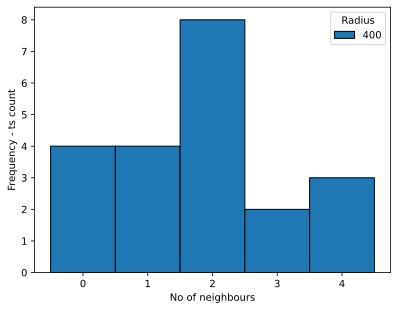

In [131]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
# Create histogram
bins = [float(x) - 0.5 for x in list(range(min(ts_neighbour_count), max(ts_neighbour_count) + 2))]
plt.hist(ts_neighbour_count, bins=bins, edgecolor='black')
plt.xlabel("No of neighbours")
plt.ylabel("Frequency - ts count")
# Set x-axis to display integer values only
plt.xticks(range(min(ts_neighbour_count), max(ts_neighbour_count) + 1))
plt.legend([RADIUS], title='Radius')
plt.show()

In [132]:
neighbours.values()

dict_values([['2330725114', 'cluster_1863241547_1863241548_1976170214'], ['1863241632', 'cluster_2302665030_2337351369'], ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190', 'cluster_274083968_cluster_1200364014_1200364088'], ['cluster_1840209209_268417350'], ['cluster_2302665030_2337351369'], ['30624898', 'cluster_371462086_469470779_98101387_cluster_371462067_371775459_371775468', 'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504'], ['30503246', 'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504'], ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190', 'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504'], [], [], [], [], ['cluster_1041665625_cluster_1387938793_1387938796_cluster_1757124361_1757124367_3

In [133]:
neighbours_list = deepcopy(neighbours)
for key, value in neighbours_list.items():
    value.append(key)

In [134]:
neighbouring_groups_to_shade = list(neighbours_list.values())

In [135]:
len(neighbouring_groups_to_shade)

21

In [136]:
neighbouring_groups_to_shade

[['2330725114', 'cluster_1863241547_1863241548_1976170214', '1863241632'],
 ['1863241632', 'cluster_2302665030_2337351369', '2330725114'],
 ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190',
  'cluster_274083968_cluster_1200364014_1200364088',
  '243351999'],
 ['cluster_1840209209_268417350', '243641585'],
 ['cluster_2302665030_2337351369', '243749571'],
 ['30624898',
  'cluster_371462086_469470779_98101387_cluster_371462067_371775459_371775468',
  'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504',
  '30503246'],
 ['30503246',
  'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504',
  '30624898'],
 ['cluster_306484187_cluster_1200363791_1200363826_1200363834_1200363898_1200363927_1200363938_1200363947_1200364074_1200364103_1507566554_1507566556_255882157_306484190',
  'cluster_1833965782_1833965806_371781950_cluster_32564118_371775504

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


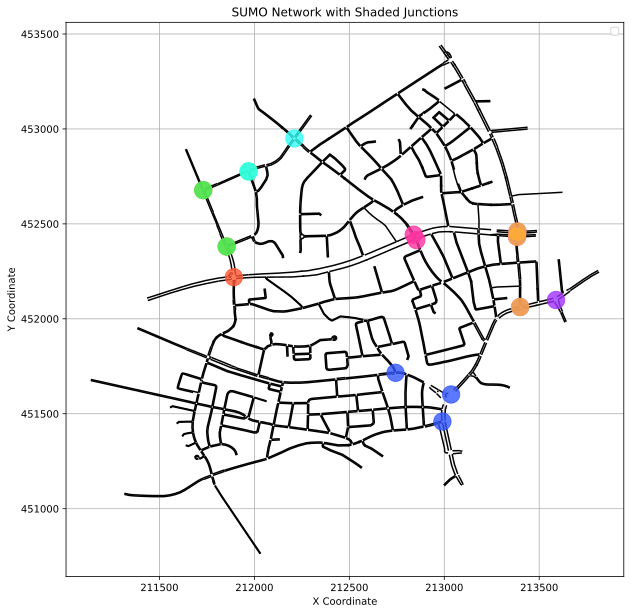

In [137]:
import sumolib
import matplotlib.pyplot as plt

# Load the SUMO network file
net = sumolib.net.readNet(net_file_ingolstadt21)

# List of junction IDs you want to shade
junction_ids_to_shade = list(neighbours.values())  # Replace with actual junction IDs

# Extract edges and their shapes
edges = net.getEdges()

# Create a plot
plt.figure(figsize=(10, 10))

# Plot each edge
for edge in edges:
    shape = edge.getShape()
    x, y = zip(*shape)
    plt.plot(x, y, color='black')


colors = [
    "#FF5733",  # Vibrant Red-Orange
    "#33FF57",  # Bright Green
    "#3357FF",  # Vivid Blue
    "#FF33A1",  # Hot Pink
    "#33FFF6",  # Aqua
    "#A133FF",  # Electric Purple
    "#FFAF33",  # Orange
    "#8DFF33",  # Lime Green
    "#33FFAF",  # Mint
    "#5733FF",  # Indigo
    "#FF3357",  # Coral
    "#33A1FF",  # Sky Blue
    "#A1FF33",  # Lemon Green
    "#FF5733",  # Red-Orange
    "#5733A1",  # Deep Purple
    "#FFA133",  # Amber
    "#33FF8D",  # Light Green
    "#AF33FF",  # Magenta
    "#FF33AF",  # Pink
    "#33A1FF",  # Light Blue
    "#8D33FF"   # Lavender
]

# Shade specific junctions
for i, shared_obs_group in enumerate(neighbouring_groups_to_shade[0:7]):
    for junction_id in shared_obs_group:
        junction = net.getNode(junction_id)
        x, y = junction.getCoord()
        plt.scatter(x, y, color=colors[i], s=300, zorder=7, alpha=0.8, label='Junction' if junction_id == junction_ids_to_shade[0] else "")

# Set plot parameters
plt.title('SUMO Network with Shaded Junctions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.axis('equal')  # Ensure the aspect ratio is equal to avoid distortion

# Add a legend
plt.legend()

# Show plot
plt.show()


In [ ]:
# Function to highlight a junction with a specified radius
def highlight_junction_with_radius(junction_id, radius, color='red'):
    junction = net.getNode(junction_id)
    x, y = junction.getCoord()
    circle = plt.Circle((x, y), radius, color=color, fill=False, linewidth=2)
    plt.gca().add_patch(circle)
    plt.scatter(x, y, color=color, s=100, zorder=7)


In [ ]:
import sumolib
import matplotlib.pyplot as plt

# List of junction IDs you want to shade
junction_ids_to_shade = list(neighbours.values())  # Replace with actual junction IDs

# Extract edges and their shapes
edges = net.getEdges()

# Create a plot
plt.figure(figsize=(10, 10))

# Plot each edge
for edge in edges:
    shape = edge.getShape()
    x, y = zip(*shape)
    plt.plot(x, y, color='black')

# Define colors
colors = [
    "#FF5733",  # Vibrant Red-Orange
    "#33FF57",  # Bright Green
    "#3357FF",  # Vivid Blue
    "#FF33A1",  # Hot Pink
    "#33FFF6",  # Aqua
    "#A133FF",  # Electric Purple
    "#FFAF33",  # Orange
    "#8DFF33",  # Lime Green
    "#33FFAF",  # Mint
    "#5733FF",  # Indigo
    "#FF3357",  # Coral
    "#33A1FF",  # Sky Blue
    "#A1FF33",  # Lemon Green
    "#FF5733",  # Red-Orange
    "#5733A1",  # Deep Purple
    "#FFA133",  # Amber
    "#33FF8D",  # Light Green
    "#AF33FF",  # Magenta
    "#FF33AF",  # Pink
    "#33A1FF",  # Light Blue
    "#8D33FF"   # Lavender
]

neighbouring_groups_to_shade_in_graph = [neighbouring_groups_to_shade[0], \
                                         neighbouring_groups_to_shade[3], \
                                         neighbouring_groups_to_shade[8], \
                                        #  neighbouring_groups_to_shade[10], \
                                         neighbouring_groups_to_shade[20]]

# Shade specific junctions
for i, shared_obs_group in enumerate(neighbouring_groups_to_shade_in_graph):
    for junction_id in shared_obs_group:
        junction = net.getNode(junction_id)
        x, y = junction.getCoord()
        plt.scatter(x, y, color="#33FFAF", s=300, zorder=7, alpha=0.8, label='Junction' if junction_id == junction_ids_to_shade[0] else "")

# Highlight junctions with radius
for group in neighbouring_groups_to_shade_in_graph:
    for junction_id in group:
        highlight_junction_with_radius(junction_id, radius=400, color='grey')  # Adjust radius as needed

# Set plot parameters
plt.title('SUMO Network with Shaded Junctions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.axis('equal')  # Ensure the aspect ratio is equal to avoid distortion

# Add a legend
plt.legend()

# Show plot
plt.show()

NameError: name 'neighbours' is not defined